#### Related library calls, setting of result display

In [1]:
import pandas as pd
import numpy as np
import functools
from matplotlib import pyplot as plt
from IPython.display import display

In [2]:
#These two are ipython magic functions that relate to drawing. The first one lets the resulting drawing be displayed directly, rather than opening an extra window. 
#The second one specifies that the drawing is a vector, which will make the picture clearer
%matplotlib inline
%config InlineBackend.figure_format='svg'

#### Definition of the read function for  data set

In [3]:
def Memory_Optimization(Original_dataframe):# This is the Dataframe memory optimisation function that I have defined in Assignment_1
    """
    Returns a dataset with a smaller memory footprint by changing the format in which the data in the original dataset is stored
    :param original_dataframe: the original dataset
    :return: the dataset with a smaller memory footprint
    """
    # Filter out columns with data type int
    Original_dataframe_int=Original_dataframe.select_dtypes(include=['int'])
    # Set the data type of the data elements in the above filtered columns to the type that takes up the least amount of space
    Optimized_dataframe_int=Original_dataframe_int.apply(pd.to_numeric,downcast='unsigned',errors ='ignore')
    #Filter out columns with data type float
    Original_dataframe_float=Original_dataframe.select_dtypes(include=['float'])
    # Set the data elements of the columns filtered above to the type that takes up the least amount of space
    Optimized_dataframe_float=Original_dataframe_float.apply(pd.to_numeric,downcast='float')
    # Filter out columns with data type object
    Original_dataframe_obj=Original_dataframe.select_dtypes(include=['object'])
    # Create a new empty DataFrame to put the optimized columns of the original type object
    Optimized_dataframe_obj=pd.DataFrame()
    # Extracts columns of type data type object
    for column in Original_dataframe_obj:
        # Calculate the length of the type column
        number_of_total=len(Original_dataframe_obj[column])
        # Calculate the number of elements in the column that are unique
        number_of_unique=len(Original_dataframe_obj[column].unique())
        # If the number of elements in unique is less than half of the total, the data type of these columns is converted to category
        if number_of_unique/number_of_total<=0.5:
            Optimized_dataframe_obj.loc[:,column]=Original_dataframe_obj[column].astype('category')
        # If the number of elements in the unique is greater than half of the total, the original data type is retained
        else:
            Optimized_dataframe_obj.loc[:,column]=Original_dataframe_obj[column]
        # Splice the three optimised columns into a DataFrame and return
    Optimized_dataframe=pd.concat([Optimized_dataframe_int,Optimized_dataframe_float,Optimized_dataframe_obj],axis=1)
    return Optimized_dataframe

In [4]:
def GetTheOptimiziatedDataType(Optimized_dataframe):# This function is also defined in Assignment_1 in relation to Dataframe optimization
    """
    Receive a Optimized df, and return a dict with it's column name as key, and datatype for the column as the value
    :param Optimized_dataframe the return from the Memory_Optimization(Original_dataframe)
    :return: A dict with the column's name and its datatype
    """
    Optimized_dataframe=Optimized_dataframe.dtypes #Get the column and its datatype (in the form of series)
    col_name=Optimized_dataframe.index # Get every colummn's name
    col_datatype=[item.name for item in Optimized_dataframe.values] # Get the datatype for each column
    colname_and_datatype=dict(zip(col_name,col_datatype)) # Put them into a dict, and can be put into read_csv()
    return colname_and_datatype

In [5]:
def getColumnValues(col_list, file_num): # This function is the function defined in Assignment_1 for file reading, 
                    #because in this assignment we need data from 2017-9 onwards, as well as filling in some vacant values, I have made a write adjustment on this function
    """
    Selects a certain number of files from a dataset, consolidates them into a DataFrame and takes the required columns and returns them.
    :param col_list: A list of column names to specify the required columns
    :param file_num: specifies the number of files to be processed
    :return: The data taken from the dataset, stored as a DataFrame, and containing only the columns specified in col_list
    """
    colname_and_datatype = GetTheOptimiziatedDataType(Memory_Optimization(pd.read_csv(f"samples.query.1.csv", sep=';')[col_list])) #Get the data type that uses the least amount of memory per column
    files = []  # Each file is processed by read_csv to get a DataFrame, and the list files is used to hold the result
    # Use an iterative method to process a specified number of files, placing the resulting number of DataFrames into a list of files
    for index in range(1, file_num + 1):
        file_name = f"samples.query.{index}.csv"
        get_file = pd.read_csv(file_name, sep=';', dtype=colname_and_datatype)[col_list] #Read the csv and store with the datatype use the least amount of memory
        # This step allows us to save data only from 2017-9 onwards and simply fill in the vacant values
        get_file = get_file[get_file['timestamp']>='2017-09'].fillna(method='ffill',inplace=False) 
        files.append(get_file)
    frame = pd.concat(files, ignore_index=True)  # Integrate the DataFrame collected in files into a whole
    return frame

#### Reading of two types of data sets (Sample & Device)

In [6]:
# Read the colunms we need in all (165) "Sample" files
Sample=getColumnValues(['device_id','battery_state','timestamp','usage','temperature','memory_active','battery_level','voltage'],165)

In [7]:
# Read two "Devvice" files
Device=pd.concat([pd.read_csv('devices.query.1.csv',sep=';'),pd.read_csv('devices.query.2.csv',sep=';')],ignore_index=True)

#### Validation of correctness of dataset reads

In [8]:
Sample

,device_id,battery_state,timestamp,usage,temperature,memory_active,battery_level,voltage
0,1,Discharging,2017-10-08 12:50:04,0.03,28.500000,496480,82.0,4.05
1,1,Discharging,2017-10-08 12:50:04,0.03,28.500000,496480,82.0,4.05
2,1,Discharging,2017-10-08 12:55:15,0.03,29.000000,500276,81.0,4.04
3,1,Discharging,2017-10-08 12:58:28,0.03,29.900000,466868,80.0,3.97
4,1,Discharging,2017-10-08 13:03:16,0.03,29.200001,507264,79.0,4.03
...,...,...,...,...,...,...,...,...
49027338,26691,Charging,2020-07-31 04:00:46,0.80,30.400000,430204,44.0,4.35
49027339,5852,Not charging,2020-07-30 03:13:19,0.98,25.000000,6732,97.0,4.20
49027340,21907,Charging,2020-07-25 00:45:01,0.98,25.000000,4248,65.0,4.20
49027341,26691,Charging,2020-07-31 16:45:52,0.44,29.500000,442024,24.0,4.35


In [9]:
Device

,id,model,manufacturer,brand,os_version,is_root,created_at
0,1,VS500PP,LGE,lge,6.0.1,0,2017-10-09 03:42:19
1,2,AO5510,YU,YU,5.1.1,1,2017-10-09 04:39:53
2,3,ASUS_X014D,asus,asus,5.1.1,0,2017-10-09 04:48:35
3,4,Nexus 5,LGE,google,6.0.1,0,2017-10-09 06:50:04
4,5,LG-D331,LGE,lge,4.4.2,0,2017-10-09 09:01:16
...,...,...,...,...,...,...,...
307612,307613,Infinix X5516B,INFINIX MOBILITY LIMITED,Infinix,9,0,2020-08-04 14:02:58
307613,307614,vivo 1713,vivo,vivo,7.0,0,2020-08-04 14:05:31
307614,307615,QMobile ENERGY X1,QMobile,QMobile,6.0,0,2020-08-04 14:09:47
307615,307616,SM-G570Y,samsung,samsung,8.0.0,0,2020-08-04 14:10:39


#### Task 1.1

In [10]:
def topTenBrands(dataset:pd.core.frame.DataFrame):
    """
    Returns the top ten brands with most phones base on the given 'device' dataset
    :param dataset: device dataset
    :return: a series，index is the brand，value is the number of phones that the brand have
    """
    # Selcet the "brand" column form dataset, use Dataframe's method .values_counts() got a series
    # The index of the Series is the brand, and the value is the numbers of brand appearance in whole dataset(also the number of phones that the brand has)
    return dataset['brand'].value_counts()[:10]

In [11]:
topTenBrands(Device)

samsung     84147
OPPO        22094
Xiaomi      16445
vivo        15452
HUAWEI      13123
motorola    12711
xiaomi      12109
lge         10907
Lenovo       8399
asus         5518
Name: brand, dtype: int64

In [12]:
def topTenmodles(dataset:pd.core.frame.DataFrame):
    """
    Returns the top ten models with most phones base on the given 'device' dataset
    :param dataset: device dataset
    :return: a series，index is the model，value is the number of phones that the model have
    """
    # Selcet the "model" column form dataset, use Dataframe's method .values_counts() got a series
    # The index of the Series is the model, and the value is the numbers of model appearance in whole dataset(also the number of phones that the model has)
    return dataset['model'].value_counts()[:10]

In [13]:
topTenmodles(Device)

Redmi 5A        3282
SM-G532G        3138
Redmi 4A        2836
SM-J200G        2669
vivo 1606       2548
Redmi Note 4    2544
SM-G610F        2478
A37f            2451
SM-G532M        2107
Redmi 6A        2046
Name: model, dtype: int64

#### Task 1.2

In [14]:
def draw_pie(Data_set:pd.core.frame.DataFrame):
    """
    Given the 'device' dataset, plot a pie chart of the proportion of phones of each brand and model in the total
    :param Data_set: device dataset
    :return: None，This is a procedural function, the purpose of which is to plot
    """

    # First customise the colours to be used in the drawing (omitting this step is fine, the system default colours will be used)
    custom_color=("#51C1C8", "#E96279", "#44A2D6", "#536D84","#51C1C8", "#E96279", "#44A2D6", "#536D84")
    # The following two lines of code are used to get the number of phones (in the form of series) for each brand, each model
    TopTenBrands=topTenBrands(Data_set)
    TopTenModels=topTenmodles(Data_set)
    # Calculate the number of Others by subtracting the top ten from the overall number
    TopTenBrands['Other']=len(Data_set)-TopTenBrands.sum()
    TopTenModels['Other']=len(Data_set)-TopTenModels.sum()
    # The next step is to generate a figure, because we have two figures we specify a 2:1 aspect ratio, in this case 14inches:7inches
    Total_figure=plt.figure(figsize=(14,7))
    # Split the figure just defined into 1 row and 2 columns, the first position will be filled with the pie chart of brand and the second position will be filled with the pie chart of model
    Brands_pie=Total_figure.add_subplot(1,2,1)
    Models_pie=Total_figure.add_subplot(1,2,2)
    # The pie chart is filled with the two positions just defined, with the parameters series, series.index, and the previously defined colors
    # For the pie chart of the model, as some areas are very small, we need to reduce the font size to avoid overlapping between the fonts.
    Brands_pie.pie(TopTenBrands,labels=TopTenBrands.index,colors=custom_color)
    Models_pie.pie(TopTenModels,labels=TopTenModels.index,textprops = {'fontsize':8},colors=custom_color)

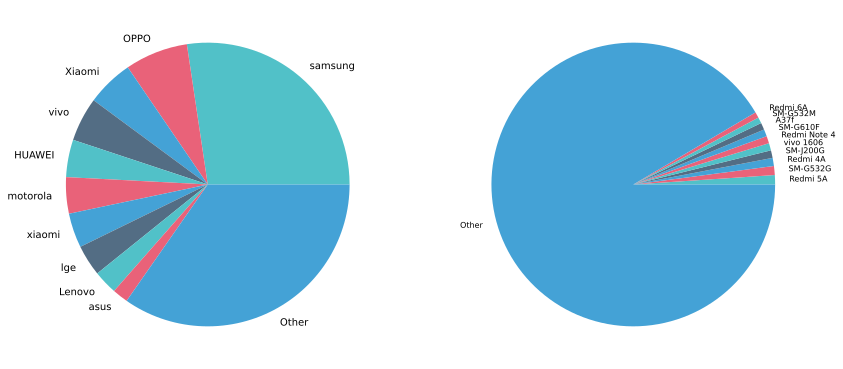

In [15]:
draw_pie(Device)

#### Task 2.1

In [16]:
def brandWithMoreModels(Data_set:pd.core.frame.DataFrame):
    """
    Returns the brand with the most models given the 'device' dataset
    :param Data_set: device dataset
    :return: A series, the index is the brand name and the value is the number of models owned by the brand
    """
    # Create an empty series to hold the results and specify its data type as int
    brand_and_its_numberOf_Type=pd.Series(dtype=int)
    # Group the dataset by brand and iterate over it. name is the name of each brand, group is a dataframe of rows of the same brand
    # We then groupby the group with modles and use len() to calculate its length to get the number of modles under each brand
    # Using the brand name "name" as the index and the lenth just obtained as the value, put it into the empty series we defined earlier
    for name,group in Data_set.groupby('brand'):brand_and_its_numberOf_Type[name]=len(group.groupby('model'))
    # Sort (in descending order) the previous series and take the first twenty and return them
    return brand_and_its_numberOf_Type.sort_values(ascending=False)[:20]

In [17]:
brandWithMoreModels(Device)

samsung     1321
lge          534
alps         496
TCL          418
HUAWEI       378
ZTE          286
Lenovo       268
htc          195
Sony         193
TECNO        188
asus         187
Micromax     186
OPPO         179
BLU          173
QMobile      154
motorola     153
Huawei       152
vivo         143
Android      141
ADVAN        121
dtype: int64

##### Korea：samsung,lge
##### China：TCL，HUAWEI，ZTE，Lenovo，HTC，TECNO，asus，OPPO，Huawei，vivo，


In [18]:
# Set up two lists to store the models under the top 20 Chinese and Korean brands
China_model,Korea_model=[],[]
Korea_brand=['samsung','lge']
China_brand=['TCL','HUAWEI','ZTE','Lenovo','HTC','TECNO','asus','OPPO','Huawei','vivo']
# The most popular model is the one with the largest number of mobile phones
# Find the models under brand and store them in the empty list we defined earlier
model_groupby_brand=Device['model'].groupby(Device['brand'])
for brand_name,group in model_groupby_brand:
    if brand_name in Korea_brand:
        Korea_model+=list(np.unique(group.values))
    if brand_name in China_brand:
        China_model+=list(np.unique(group.values))
# Calculate the number of mobile phones owned by each model, find the number of mobile phones owned by Chinese and Korean models according to the list we got before, find the maximum value and display it
display('most popular Korea model:',Device['model'].value_counts()[Korea_model].sort_values(ascending=False).index[0])
display('most popular China model:',Device['model'].value_counts()[China_model].sort_values(ascending=False).index[0])

'most popular Korea model:'

'SM-G532G'

'most popular China model:'

'vivo 1606'

#### Task 2.2

In [19]:
def meanCPUUsage(Top_N:int,Data_set_sample:pd.core.frame.DataFrame,Data_set_device:pd.core.frame.DataFrame):
    """
    Several models with the highest average CPU usage and their temperature and other parameters (in the form of dataframe) are returned
    through the given parameters to specify the output quantity and two data sets
    :param Top_N: The number of model to output
    :param Data_set_sample: sample dataset
    :param Data_set_device: device dataset
    :return: A dataframe, index is the model with the highest average CPU usage, and column is the usage, temperature and other data of these models
    """
    result=[]# Set up a list to save our results
    # Via device_ ID groupsby usage, and then calculates the average value of each group of usage. This will be a series
    device_id_with_meanCPUUsage=Data_set_sample['usage'].groupby(Data_set_sample['device_id']).mean().sort_values(ascending=False)
    # Groupby id through model
    group_of_model=Data_set_device['id'].groupby(Data_set_device['model'])
    # Generate an empty series. Its index is the name of the model, and value is the average value of the usage corresponding to the model
    model_with_mean_usage=pd.Series(float)
    # Traversal the groupby object
    for model_name,group in group_of_model:
        # Through the corresponding ID of each model, find the corresponding line in "device_id_with_meancpuusage" to form a sub_ series。 
        # Because not all IDS can be found in "device_id_with_meancpuusage", we use isin to judge
        exist_index=device_id_with_meanCPUUsage[device_id_with_meanCPUUsage[pd.Series(device_id_with_meanCPUUsage.index.isin(group.values)).values==True].index]
        # Find this sub_ The average value of the series and its length. The length is used to determine whether to put the results in "model_with_mean_usage"
        Mean=exist_index.mean()
        lenth=len(exist_index)
        if lenth!=0: # If sub_ Series is not empty. We set its mean value to value, model_ Name puts the index into "model_with_mean_usage"
            model_with_mean_usage[model_name]=Mean#device_id_with_meanCPUUsage[group.values].mean()
    # Sort our results and filter out the top n
    model_with_mean_usage=model_with_mean_usage[1:].sort_values(ascending=False)[:Top_N]
    # Find the device that appears in the sample dataset_ id
    device_in_sample=Data_set_sample['device_id'].unique()
    # Traverse the previously generated groupby object
    for model_name,group in group_of_model:
        if model_name in model_with_mean_usage: # If model_ Name in "model_with_mean_usage"
            sub_result=[] # We generate a list to hold intermediate data
            targeted_device_ids=np.intersect1d(group.values,device_in_sample) # Find the devices that exist in the sample dataset_ id
            for index,targeted_device_id in enumerate(targeted_device_ids): # Traverse these devices_ id
                # Find each device in the sample dataset_ ID, and find the average value to get a row of dataframe
                sub_element=Data_set_sample[Data_set_sample['device_id']==targeted_device_id][['usage','temperature','memory_active','battery_level','voltage']].mean()
                sub_result.append(sub_element) # Put these dataframes into a list
                if index==len(targeted_device_ids)-1: # If we have run to the end of the group
                    element=functools.reduce(lambda x,y:x+y,sub_result)/len(sub_result)# We average all dataframes in the list
                    # And put them in a list of final results
                    result.append(pd.DataFrame(data=[element.values],index=Data_set_device[Data_set_device['id']==targeted_device_id]['model'],columns=element.index))
    return pd.concat(result).sort_values(by='usage',ascending=False)# Finally, these dataframes are spliced and sorted

In [20]:
Dataframe_meanCPUUsage=meanCPUUsage(20,Sample,Device)

In [21]:
Dataframe_meanCPUUsage

,usage,temperature,memory_active,battery_level,voltage
model,,,,,
M706,3.686500,25.000000,137601.000000,42.500000,3.538000
iris353,1.743981,39.609615,684149.384615,77.849998,4.002250
Y538,1.504872,24.812820,289559.282051,25.487179,3.877436
QMobile X11,1.137362,30.406466,253133.941667,38.064800,3.669430
AT7E,1.134461,25.000000,148421.104874,34.159527,3.711181
JS 300,1.120130,25.000000,151651.269565,57.060871,3.814565
4047G,1.086915,28.626303,159356.894928,52.129463,3.920041
WZX-10,1.063073,25.000000,236957.908257,69.610092,3.927660
MOBO MB600,1.057016,27.709303,279812.666667,50.395348,3.834651


<AxesSubplot:xlabel='model'>

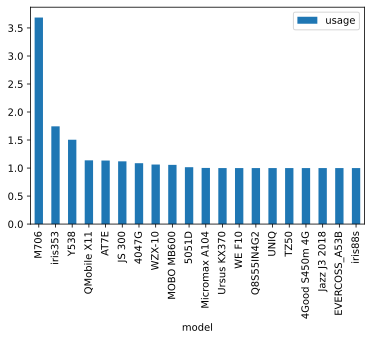

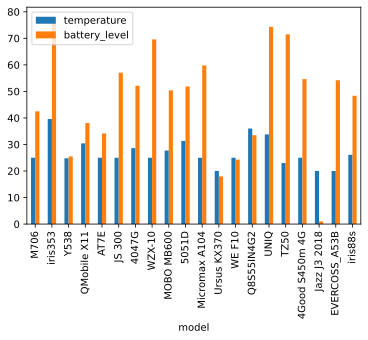

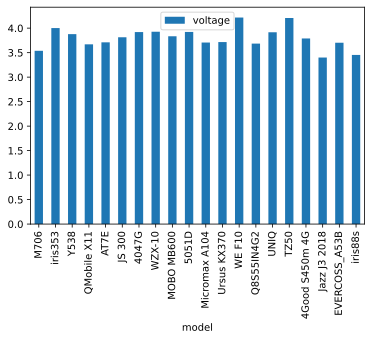

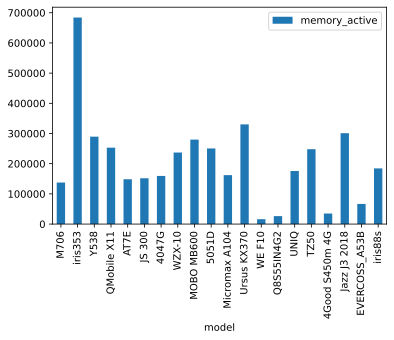

In [22]:
# Because different data have different orders of magnitude, I divided them into several subgraphs
Dataframe_meanCPUUsage[['usage']].plot.bar()
Dataframe_meanCPUUsage[['temperature','battery_level']].plot.bar()
Dataframe_meanCPUUsage[['voltage']].plot.bar()
Dataframe_meanCPUUsage[['memory_active']].plot.bar()

#### Task 2.3

In [23]:
def calculate_difference_of_timestamp(start:str,end:str):
    """
    The subfunction of longestdischargesequence() is used to calculate the difference between two string timestamps (to calculate the length of the discharge sequence)
    :param Start: The time discharge sequence start
    :param end: The time discharge sequence start
    :return: A time difference, in the form of pd._libs.tslibs.timedeltas.Timedelta
    """
    return pd.Timestamp(end)-pd.Timestamp(start)

In [24]:
def find_longest_In_OneGroup(SubDataframe:pd.core.frame.DataFrame,Type='longest'):
    """
    The subfunction of longestdischargesequence() is used to calculate the longest lenth of the dischargesequence in a dataframe
    :param SubDataframe: A dataframe to find the longest discharge sequence
    :param Type: To determine return the longest or the average lenth of the discharge sequence 
    :return: The longest or the average lenth of the discharge sequence 
    """
    state,result,lenth,index=0,[],len(SubDataframe),0
    last_item=(0,0,'Charging','0') # Set "row 0" to handle some special cases in our subsequent iterations
    for item in SubDataframe.itertuples(): # Traverse dataframe
        index+=1
        # First, find the start of the discharge sequence. The start of the discharge sequence means that the previous state belongs to a non discharge state and now is discharging
        if last_item[2]!='Discharging' and item[2]=='Discharging':start=item[3]
        # If the previous item is in the charged state and the current item is in the non charged state, the time of the previous item is end. And calculate the time difference then append it to a list
        if last_item[2]=='Discharging' and item[2]!='Discharging':
            end=last_item[3]
            result.append(calculate_difference_of_timestamp(start,end))
        # If the current element is the last one and the current element is in the state of discharge, we cannot traverse to the next element (it is already the last one). We should set the timestamp at this time to end
        if index==lenth and item[2]=='Discharging':
            end=item[3]
            result.append(calculate_difference_of_timestamp(start,end))
        last_item=item # When a traverse is completed, we re identify the current item as last_ item
    if not result:return pd._libs.tslibs.timedeltas.Timedelta(0) # If the list is empty, it means that there is no discharge sequence in this device, and 0 is returned directly
    if Type=='longest':return max(result) # Accroding to the parameter, choose what to return
    else:return np.mean(result)

In [25]:
def longestDischargeSequence(Data_set_sample:pd.core.frame.DataFrame,Type='longest'):
    """
    This function returns the longest discharge sequence in a given dataset
    :param Data_set_sample: Sample dataset
    :param Type: To determine return the longest or the average lenth of the discharge sequence 
    :return: The longest or the average lenth of the discharge sequence of each device (in the form of series)
    """
    result_series=pd.Series(pd._libs.tslibs.timedeltas.Timedelta) #set a empty series to store the result
    # groupby the 'battery_state','timestamp' according to the device_id a apply the find_longest_In_OneGroup in each sub_group
    for device_id,group in Data_set_sample[['device_id','battery_state','timestamp']].sort_values(by='timestamp').groupby('device_id'):
        result_series[device_id]=find_longest_In_OneGroup(group,Type)#.seconds
    return result_series[1:]

In [26]:
longestDischargeSequence(Sample).max()

Timedelta('6921 days 00:51:31')

In [27]:
# generate a series with the device id as index, and the average lenth of discharge sequence as value (which will be used in next function)
average_Discharge_Sequence=longestDischargeSequence(Sample,'average')

In [28]:
def phonesWithTheBestBatteries(Number_To_Display:int):
    """
    This function returns the model with the longest average discharge sequence in the first n, and its corresponding brand, Android and other information
    :param Number_To_Display: As its name, to display n model
    :return: A tuple include the information about the top_n model with the longest average discharge sequence
    """
    result=[] # Set a list to store our result
    Model_With_Best_Batteries=pd.Series(pd._libs.tslibs.timedeltas.Timedelta) # Set a Series whose index is the model, and the value is the corresponding average discharge sequence
    for model_name,group in Device['id'].groupby(Device['model']): # Grouby id accroding to the model and traverse is
        # The next three step is really similar to the task 2.2, which i have explain
        exist_index=average_Discharge_Sequence[average_Discharge_Sequence[pd.Series(average_Discharge_Sequence.index.isin(group.values)).values==True].index]
        Mean=exist_index.sum()/len(group.values)
        lenth=len(exist_index)
        if lenth!=0:
            Model_With_Best_Batteries[model_name]=exist_index.sum()/len(group.values) # Fill the series we defined before with the model_name a the average discharge sequence of it
    Model_With_Best_Batteries=Model_With_Best_Batteries[1:].sort_values(ascending=False)[:Number_To_Display] # Sort the Series select what we need and drop the metadata in it
    for item in Model_With_Best_Batteries.index:
        # Search in the Device Dataset accroding to the model_name, just save the first one for the others are the same
        result.append(Device[Device['model']==item][['model','brand','os_version']].iloc[0]) 
    return tuple(result)

In [29]:
sample=phonesWithTheBestBatteries(30)

In [30]:
for item in sample:
    display(item)

model         GT-N8020
brand          samsung
os_version       4.4.2
Name: 2422, dtype: object

model          W510
brand          QBEX
os_version    5.1.1
Name: 14408, dtype: object

model           WIM
brand          WIKO
os_version    7.1.1
Name: 40181, dtype: object

model         CINK TAB ER7415
brand                 unknown
os_version              5.1.1
Name: 7074, dtype: object

model         B9401
brand         Bitel
os_version      7.0
Name: 9800, dtype: object

model           E71
brand         KENBO
os_version      5.1
Name: 17403, dtype: object

model         K01A
brand         asus
os_version     5.0
Name: 28464, dtype: object

model         Masstel N535
brand         Masstel_N535
os_version             6.0
Name: 8463, dtype: object

model          U509
brand         Ufone
os_version    4.2.2
Name: 42284, dtype: object

model         FREEDOM C105
brand                Just5
os_version             7.0
Name: 3201, dtype: object

model         Hot 5X
brand           SPRD
os_version       6.0
Name: 61513, dtype: object

model         6045I
brand           TCL
os_version    5.0.2
Name: 19568, dtype: object

model         PSP3403DUO
brand          Prestigio
os_version           5.1
Name: 30534, dtype: object

model         LG-K500n
brand              lge
os_version       6.0.1
Name: 792, dtype: object

model           XT1801
brand         motorola
os_version       8.1.0
Name: 3022, dtype: object

model         vivo X9
brand            vivo
os_version      6.0.1
Name: 3772, dtype: object

model         Lenovo K32c30
brand                Lenovo
os_version            5.1.1
Name: 48470, dtype: object

model          P022
brand          asus
os_version    5.0.2
Name: 904, dtype: object

model         LG-D175f
brand              lge
os_version       4.4.2
Name: 3817, dtype: object

model         PTB7PAP_PTB7PAB_PTB7PAR
brand                          Philco
os_version                      7.1.2
Name: 6611, dtype: object

model             C20
brand         Hisense
os_version      5.1.1
Name: 36249, dtype: object

model          LEM8
brand          LEM8
os_version    7.1.1
Name: 56826, dtype: object

model         MHA-AL00
brand           HUAWEI
os_version         7.0
Name: 1587, dtype: object

model            A750
brand         QMobile
os_version      4.2.1
Name: 6200, dtype: object

model         SM-T230NT
brand           samsung
os_version        4.4.2
Name: 37646, dtype: object

model         5051D
brand           TCL
os_version    6.0.1
Name: 176, dtype: object

model         6055K
brand           TCL
os_version    6.0.1
Name: 1032, dtype: object

model         SAMSUNG-SM-G360AZ
brand                   samsung
os_version                4.4.4
Name: 5606, dtype: object

model         TITANIUM S205 2GB
brand                   Karbonn
os_version                  5.1
Name: 33649, dtype: object

model         Le X620
brand           LeEco
os_version        6.0
Name: 306, dtype: object